# In this notebook I will try to create predictive models for data considered in EDA.ipynb

In [1]:
import numpy as np
import pandas as pd
from fix_data import fix_data
data_imported = pd.read_csv("weatherHistory.csv", delimiter=",")
data = fix_data(data_imported)


In [2]:
data.columns

Index(['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'is_partly_cloudy', 'is_mostly_cloudy', 'is_overcast', 'is_humid',
       'is_windy', 'is_foggy', 'is_rain', 'is_breezy', 'is_dry', 'is_clear',
       'is_drizzle', 'month'],
      dtype='object')

Before performing anything i will remove "Wind Bearing (degrees)" because direction of wind is in my opinion irrelevant

In [3]:
data.drop('Wind Bearing (degrees)', axis=1, inplace=True)

#### Apart from wind bearing:
-"Summary" was removed because i tranformed it into one hot encoding like variables "is_[something]"  
-"Daily Summary" was removed because not only was it similar to "Summary" but also it gave information about particular day, not particular observation  
-"Formatted Date" was removed because after taking month from it i decided that i do not need anything else from date 

In [4]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'is_partly_cloudy', 'is_mostly_cloudy',
       'is_overcast', 'is_humid', 'is_windy', 'is_foggy', 'is_rain',
       'is_breezy', 'is_dry', 'is_clear', 'is_drizzle'],
      dtype='object')

In [5]:
categorical_features = data.select_dtypes(include=[object])
categorical_features.columns

Index(['Precip Type', 'month'], dtype='object')

In [6]:
data_encoded = pd.get_dummies(data)

Below i will split data into train / test data

In [7]:
from sklearn.model_selection import train_test_split
X = data_encoded.drop('Temperature (C)', axis=1)
y = data_encoded['Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=17)

#### Model building

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
prediction = reg.predict(X_test)

In [9]:
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.9916038651182106

High r-squared score suggest that the model is really well fit (or overfitted). It is probably because we have access to Apparent Temperature which is linearly correlated with Temperature.

In [42]:
import matplotlib.pyplot as plt
from scipy.stats import norm
def compareToNormal(data, numberOfBins=25):    
    
    mu, std = norm.fit(data)
    plt.hist(data, bins=numberOfBins, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

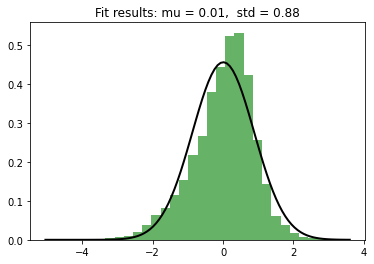

In [43]:
diffs = y_test - prediction
compareToNormal(diffs, 30)

The perfect errors of linear regression should be similar to normal distribution. I think it is quite similar.

## I will also try random forest regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=5, random_state=17)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

In [25]:
r2_score(y_test, forest_pred)

0.9927947910657839

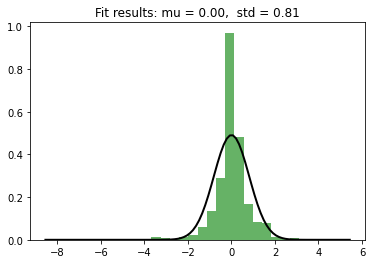

In [44]:
diffs_forest = y_test - forest_pred
compareToNormal(diffs_forest, 30)

Compared to linear regression: mu equals 0 and lower STD suggest that random forest is better fit 

### In real life one would not have access to apparent temp so i will remove it and see what will happen with models.

In [31]:
data_encoded_c = data_encoded.drop('Apparent Temperature (C)', axis=1)
X_c = data_encoded_c.drop('Temperature (C)', axis=1)
y_c = data_encoded_c['Temperature (C)']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.29, random_state=17)

In [36]:
reg_c = LinearRegression().fit(X_train_c, y_train_c)
prediction_c = reg_c.predict(X_test_c)
r2_score(y_test_c, prediction_c)

0.8719546378654354

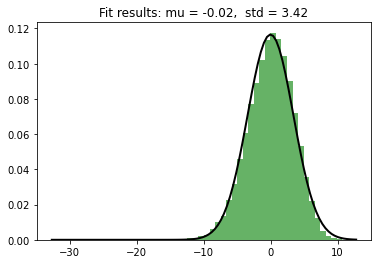

In [46]:
diffs_c = y_test_c - prediction_c
compareToNormal(diffs_c  , 50)

Despite the fact the diffs seem to fit normal dist better: mu is a little bit further from 0 and std is bigger, so the "accuracy" of the plot does not have to say that this model is better or something. At leas, here we do not have overfit like earlier.

### Again: i try random forest

In [64]:
forest_c = RandomForestRegressor(max_depth=5, random_state=17)
forest.fit(X_train_c, y_train_c)
forest_pred_c = forest.predict(X_test_c)

In [65]:
r2_score(y_test_c, forest_pred_c)

0.7548536107941743

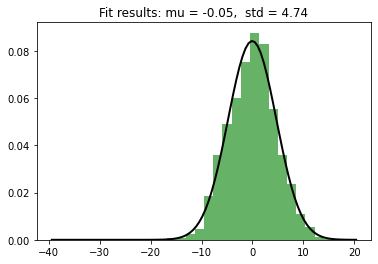

In [66]:
diffs_forest_c = y_test_c - forest_pred_c
compareToNormal(diffs_forest_c, 30)